# Forest Cover Type Prediction

In [2]:
import numpy as np
import pandas as pd
# import math
# import scipy
# import time
# import gc
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt


# Model & Evaluation
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import StratifiedKFold, train_test_split, cross_val_score, GridSearchCV
# from sklearn.metrics import accuracy_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
# from sklearn import metrics, ensemble,linear_model
from sklearn.pipeline import Pipeline

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
submission = pd.read_csv('sampleSubmission.csv')

In [4]:
df = pd.concat([test.assign(indic="test"), train.assign(indic="train")]).set_index("Id")

In [5]:
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,indic,Cover_Type
Id,,,,,,,,,,,,,,,,,,,,,
15121,2680,354,14,0,0,2684,196,214,156,6645,...,0,0,0,0,0,0,0,0,test,NaN
15122,2683,0,13,0,0,2654,201,216,152,6675,...,0,0,0,0,0,0,0,0,test,NaN
15123,2713,16,15,0,0,2980,206,208,137,6344,...,0,0,0,0,0,0,0,0,test,NaN
15124,2709,24,17,0,0,2950,208,201,125,6374,...,0,0,0,0,0,0,0,0,test,NaN
15125,2706,29,19,0,0,2920,210,195,115,6404,...,0,0,0,0,0,0,0,0,test,NaN


In [6]:
len(df)

581012

In [7]:
df.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,...,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,15120.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226,...,0.090392,0.077716,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060,4.000000
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210,...,0.286743,0.267725,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121791,2.000066
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,3163.000000,260.000000,18.000000,384.000000,69.000000,3328.000000,231.000000,237.000000,168.000000,2550.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
max,3858.000000,360.000000,66.000000,1397.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


## Finding outliers 

In [8]:
def find_outliers_IQR(df):
    q1=df.quantile(0.25)
    q3=df.quantile(0.75)
    IQR=q3-q1
    outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
    return outliers

In [9]:
find_outliers_IQR(df.iloc[:,1:11]).count()

Aspect                                    0
Slope                                 15316
Horizontal_Distance_To_Hydrology      14557
Vertical_Distance_To_Hydrology        31463
Horizontal_Distance_To_Roadways         669
Hillshade_9am                         17433
Hillshade_Noon                        15672
Hillshade_3pm                          7832
Horizontal_Distance_To_Fire_Points    31157
Wilderness_Area1                          0
dtype: int64

## Correlation between numerical variables

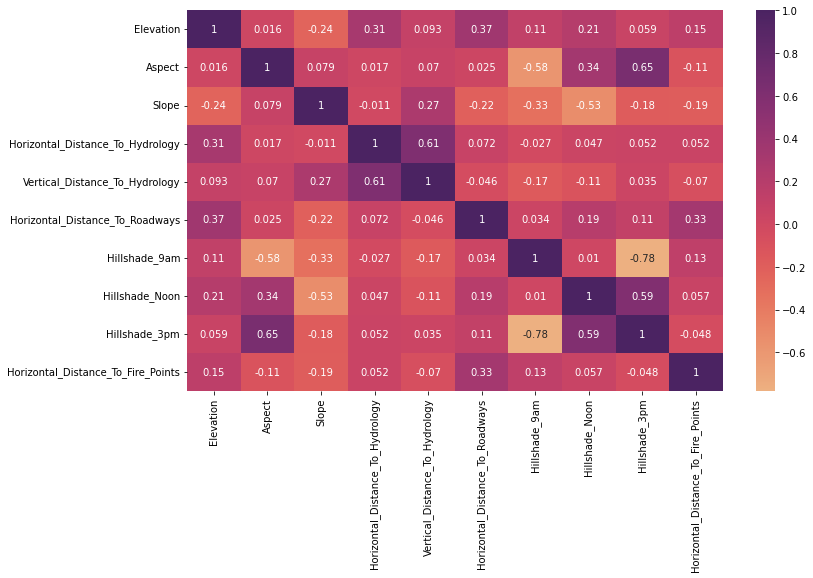

In [10]:
plt.subplots(figsize=(12,7))
sns.heatmap(df.iloc[:,0:10].corr(), annot=True, cmap = 'flare');

In [11]:
def wilderness_area_encoding(df):
    data = df.copy()
    data['Wilderness_Area'] = 0
    for i in range(1,5):
        data['Wilderness_Area'] += i*data[f'Wilderness_Area{i}']
    return data

In [12]:
def soil_type_encoding(df):
    data = df.copy()
    data['Soil_Type'] = 0
    for i in range(1,41):
        data['Soil_Type'] += i*data[f'Soil_Type{i}']
    return data

In [13]:
df = soil_type_encoding(df)

In [14]:
df = wilderness_area_encoding(df)

In [15]:
def add_general_features(data):
    df = data.copy()

            
    df['Horizontal_Distance_To_Roadways_Log'] = [math.log(v+1) for v in df['Horizontal_Distance_To_Roadways']]
    df['Water Elevation'] = df['Elevation'] - df['Vertical_Distance_To_Hydrology']
    df['Hydro_Fire_1'] = df['Horizontal_Distance_To_Hydrology'] + df['Horizontal_Distance_To_Fire_Points']
    df['Hydro_Fire_2'] = abs(df['Horizontal_Distance_To_Hydrology'] - df['Horizontal_Distance_To_Fire_Points'])
    df['Hydro_Road_1'] = abs(df['Horizontal_Distance_To_Hydrology'] + df['Horizontal_Distance_To_Roadways'])
    df['Hydro_Road_2'] = abs(df['Horizontal_Distance_To_Hydrology'] - df['Horizontal_Distance_To_Roadways'])
    df['Fire_Road_1'] = abs(df['Horizontal_Distance_To_Fire_Points'] + df['Horizontal_Distance_To_Roadways'])
    df['Fire_Road_2'] = abs(df['Horizontal_Distance_To_Fire_Points'] - df['Horizontal_Distance_To_Roadways'])
    df['EHiElv'] = df['Horizontal_Distance_To_Roadways'] * df['Elevation']
    df['EVDtH'] = df.Elevation - df.Vertical_Distance_To_Hydrology
    df['EHDtH'] = df.Elevation - df.Horizontal_Distance_To_Hydrology * 0.2
    df['Elev_3Horiz'] = df['Elevation'] + df['Horizontal_Distance_To_Roadways']  + df['Horizontal_Distance_To_Fire_Points'] + df['Horizontal_Distance_To_Hydrology']
    df['Elev_Road_1'] = df['Elevation'] + df['Horizontal_Distance_To_Roadways']
    df['Elev_Road_2'] = df['Elevation'] - df['Horizontal_Distance_To_Roadways']
    df['Elev_Fire_1'] = df['Elevation'] + df['Horizontal_Distance_To_Fire_Points']
    df['Elev_Fire_2'] = df['Elevation'] - df['Horizontal_Distance_To_Fire_Points']
    
    # Fill NA
    df.fillna(0, inplace = True)

    
    return df

In [16]:
df = add_general_features(df)

## Type Features
new features based on the soil-type variables:


1. Climatic Zone
2. Geologic Zone
3. Surface Cover
4. Rock Size
5. Interaction Terms


### ELU Codes
The soil type number is based on the USFS Ecological Landtype Units (ELUs). 

In [17]:
ELU_CODE = {
    1:2702,2:2703,3:2704,4:2705,5:2706,6:2717,7:3501,8:3502,9:4201,
    10:4703,11:4704,12:4744,13:4758,14:5101,15:5151,16:6101,17:6102,
    18:6731,19:7101,20:7102,21:7103,22:7201,23:7202,24:7700,25:7701,
    26:7702,27:7709,28:7710,29:7745,30:7746,31:7755,32:7756,33:7757,
    34:7790,35:8703,36:8707,37:8708,38:8771,39:8772,40:8776
}

##  Climatic Zone (Ordinal Variable)

1. lower montane dry
2. lower montane
3. montane dry
4. montane
5. montane dry and montane
6. montane and subalpine
7. subalpine
8. alpine

In [18]:
def climatic_zone(df):
    data = df.copy()
    data['Climatic_Zone'] = df['Soil_Type'].apply(
        lambda x: int(str(ELU_CODE[x])[0])
    )
    return data

In [19]:
df = climatic_zone(df)

##  Geologic Zone (Nominal Variable)

1. alluvium
2. glacial
3. shale
4. sandstone
5. mixed sedimentary
6. unspecified in the USFS ELU Survey
7. igneous and metamorphic
8. volcanic

In [20]:
def geologic_zone(df):
    data = df.copy()
    data['Geologic_Zone'] = df['Soil_Type'].apply(
        lambda x: int(str(ELU_CODE[x])[1])
    )
    return df

In [21]:
# Geologic Zone
df = geologic_zone(df)

## Surface Cover (Ordinal Variable)

1. (Stony/Bouldery) 
2. (Very Stony/Very Bouldery) 
3. (Extremely Stony/Extremely Bouldery) 
4. (Rubbly)
5. (Very Rubbly) 

If no description of the surface cover is given, we give it a value of 0.

In [22]:
def surface_cover(df):
    #Group IDs
    no_desc = [7,8,14,15,16,17,19,20,21,23,35]
    stony = [6,12]
    very_stony = [2,9,18,26]
    extremely_stony = [1,22,24,25,27,28,29,30,31,32,33,34,36,37,38,39,40]
    rubbly = [3,4,5,10,11,13]

    #Create dictionary
    surface_cover = {i:0 for i in no_desc}
    surface_cover.update({i:1 for i in stony})
    surface_cover.update({i:2 for i in very_stony})
    surface_cover.update({i:3 for i in extremely_stony})
    surface_cover.update({i:4 for i in rubbly})
    
    #Create Feature
    data = df.copy()
    data['Surface_Cover'] = df['Soil_Type'].apply(
        lambda x: surface_cover[x]
    )
    return data

In [23]:
df = surface_cover(df)

## Rock Size (Nominal)

1. Stones
2. Boulders
3. Rubble

If the soil type description has no mention of rock size, we give it a default value of 0.

In [24]:
def rock_size(df):
    
    # Group IDs
    no_desc = [7,8,14,15,16,17,19,20,21,23,35]
    stones = [1,2,6,9,12,18,24,25,26,27,28,29,30,31,32,33,34,36,37,38,39,40]
    boulders = [22]
    rubble = [3,4,5,10,11,13]

    # Create dictionary
    rock_size = {i:0 for i in no_desc}
    rock_size.update({i:1 for i in stones})
    rock_size.update({i:2 for i in boulders})
    rock_size.update({i:3 for i in rubble})
    
    data = df.copy()
    data['Rock_Size'] = df['Soil_Type'].apply(
        lambda x: rock_size[x]
    )
    return data

In [26]:
df = rock_size(df)

## Soil Type Interactions

In [27]:
def soiltype_interactions(data):
    df = data.copy()
            
    # Important Soil Types
    df['Soil_12_32'] = df['Soil_Type32'] + df['Soil_Type12']
    df['Soil_Type23_22_32_33'] = df['Soil_Type23'] + df['Soil_Type22'] + df['Soil_Type32'] + df['Soil_Type33']
    
    # Soil Type Interactions
    df['Soil29_Area1'] = df['Soil_Type29'] + df['Wilderness_Area1']
    df['Soil3_Area4'] = df['Wilderness_Area4'] + df['Soil_Type3']
    
    #  New Feature Interactions
    df['Climate_Area2'] = df['Wilderness_Area2']*df['Climatic_Zone'] 
    df['Climate_Area4'] = df['Wilderness_Area4']*df['Climatic_Zone'] 
    df['Rock_Area1'] = df['Wilderness_Area1']*df['Rock_Size']    
    df['Rock_Area3'] = df['Wilderness_Area3']*df['Rock_Size']  
    df['Surface_Area1'] = df['Wilderness_Area1']*df['Surface_Cover'] 
    df['Surface_Area2'] = df['Wilderness_Area2']*df['Surface_Cover']   
    df['Surface_Area4'] = df['Wilderness_Area4']*df['Surface_Cover'] 
    
    # Fill NA
    df.fillna(0, inplace = True)
    
    return df

In [28]:
df = soiltype_interactions(df)

## Dimension Reduction

In [29]:
soil_features = [f'Soil_Type{i}' for i in range(1,41)]

In [30]:
df.drop(columns = soil_features, inplace = True)

In [31]:
wilderness_features = [f'Wilderness_Area{i}' for i in range(1,5)]

In [32]:
df.drop(columns = wilderness_features, inplace = True)

## Split dataframe 

In [33]:
test, train = df[df["indic"].eq("test")],df[df["indic"].eq("train")]

In [34]:
X = train.drop(['Cover_Type','indic'], axis=1)
X_test = test.drop(['Cover_Type', 'indic'], axis=1)
y = train.Cover_Type

## Random Forest

In [35]:
pipeline = Pipeline(steps=[('scaler', RobustScaler()), ('model', RandomForestClassifier())])

param_grid = {'model__n_estimators':[200], 'model__n_jobs':[-1]}

skf = StratifiedKFold(n_splits = 12, shuffle = True, random_state = 0)

estimator = GridSearchCV(pipeline, param_grid, cv=skf)
estimator.fit(X, y)
estimator.best_score_

0.894510582010582

## Saving to CSV 

In [36]:
submission['Cover_Type'] = estimator.best_estimator_.predict(X_test).astype("int")
submission.to_csv('submission.csv', index=False)